In [253]:
import warnings
warnings.filterwarnings('ignore')

In [254]:
import pandas_datareader.data as web
import numpy as np
import pandas as pd
import datetime

In [255]:
start = datetime.datetime(2018, 7, 1) # 指定开始时间
end = datetime.datetime.now() # 指定结束时间
print(start, end)
code = '002588.SZ'
# code = '603187.SS'

# 获取股票数据
stock_data = web.DataReader(code, 'yahoo', start, end)
# print(SS600036)
stock_data.to_csv("ipynb_data/{}.csv".format(code))
df = pd.read_csv("ipynb_data/{}.csv".format(code))
df.info()
df.tail(10)

2018-07-01 00:00:00 2020-07-28 20:23:03.257410
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       503 non-null    object 
 1   High       503 non-null    float64
 2   Low        503 non-null    float64
 3   Open       503 non-null    float64
 4   Close      503 non-null    float64
 5   Volume     503 non-null    float64
 6   Adj Close  503 non-null    float64
dtypes: float64(6), object(1)
memory usage: 27.6+ KB


,Date,High,Low,Open,Close,Volume,Adj Close
493,2020-07-15,5.07,4.83,4.99,4.84,24667780.0,4.84
494,2020-07-16,4.95,4.66,4.85,4.68,22727882.0,4.68
495,2020-07-17,4.80,4.62,4.68,4.71,15408891.0,4.71
496,2020-07-20,5.09,4.74,4.75,4.99,27023183.0,4.99
497,2020-07-21,5.03,4.88,5.00,4.93,12479876.0,4.93
498,2020-07-22,4.97,4.88,4.94,4.91,14569409.0,4.91
499,2020-07-23,4.93,4.71,4.93,4.86,15377102.0,4.86
500,2020-07-24,4.93,4.68,4.82,4.69,16813595.0,4.69
501,2020-07-27,5.16,4.71,4.71,5.05,57040390.0,5.05
502,2020-07-28,5.35,4.97,5.00,5.26,67312922.0,5.26


In [256]:
df.isnull().values.sum()

0

In [257]:
#计算跌涨幅
df['Range'] = df['Close']  - df['Close'].shift(1)

In [258]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif']=['SimHei']
#⽤来正常显示中⽂标签
plt.rcParams['axes.unicode_minus']=False 
#⽤来正常显示负号 #有中⽂出现的情况，需要u'内容'

In [259]:
#调整数据索引
df.index = df.Date
df  =  df[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Range']]

<AxesSubplot:title={'center':'002588.SZ tendency'}, xlabel='Date'>

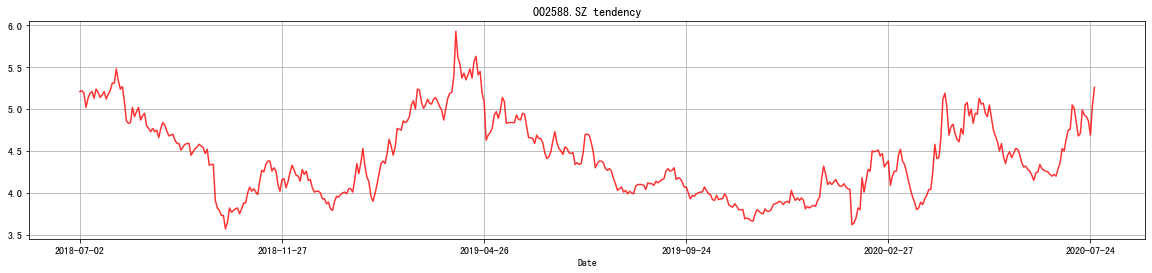

In [260]:
#简单查看股票价格走势图
df['Close'].plot(figsize=(20,4),
                 color = 'r',
                 alpha = 0.8,
                 grid = True,
                 rot = 0,
                 title='{} tendency'.format(code))

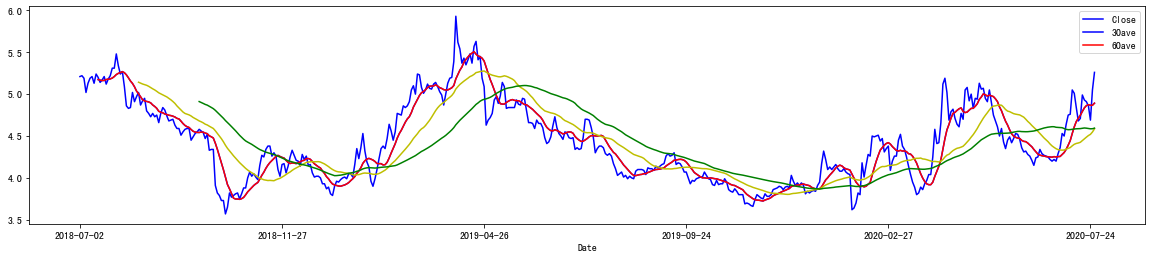

In [261]:
#绘制移动平均线

df['Close'].plot(figsize=(20,4), c='b')
df['Close'].rolling(window=10).mean().plot(c='b')
df['Close'].rolling(window=10).mean().plot(c='r')
df['Close'].rolling(window=30).mean().plot(c='y')
df['Close'].rolling(window=60).mean().plot(c='g')
plt.legend(['Close','30ave','60ave'],loc='best')
plt.show()

(<matplotlib.collections.LineCollection at 0x7fe0b6d2c550>,
 <matplotlib.collections.PolyCollection at 0x7fe0b6cfaa10>)

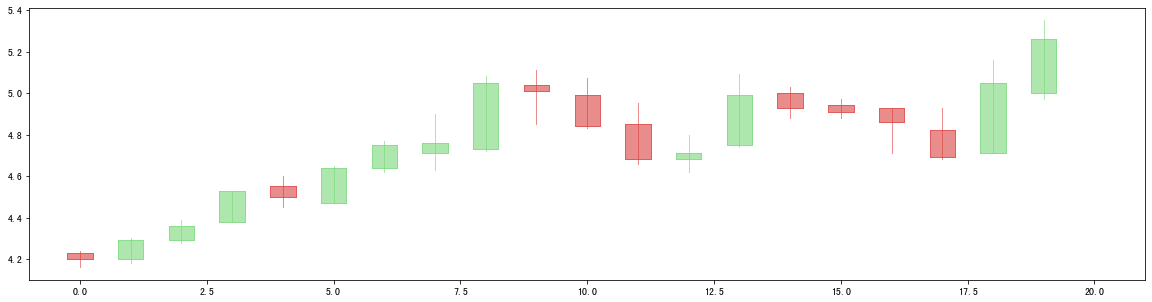

In [262]:
from mpl_finance import candlestick2_ohlc
y2020 = df['2020-07-01':'2020-08-01']
fig, ax = plt.subplots(figsize=(20,5))
candlestick2_ohlc(ax, y2020.Open, y2020.High, y2020.Low, y2020.Close, width=0.5, alpha =0.6, colorup='#77d879', 
colordown='#db3f3f')

<AxesSubplot:xlabel='Date'>

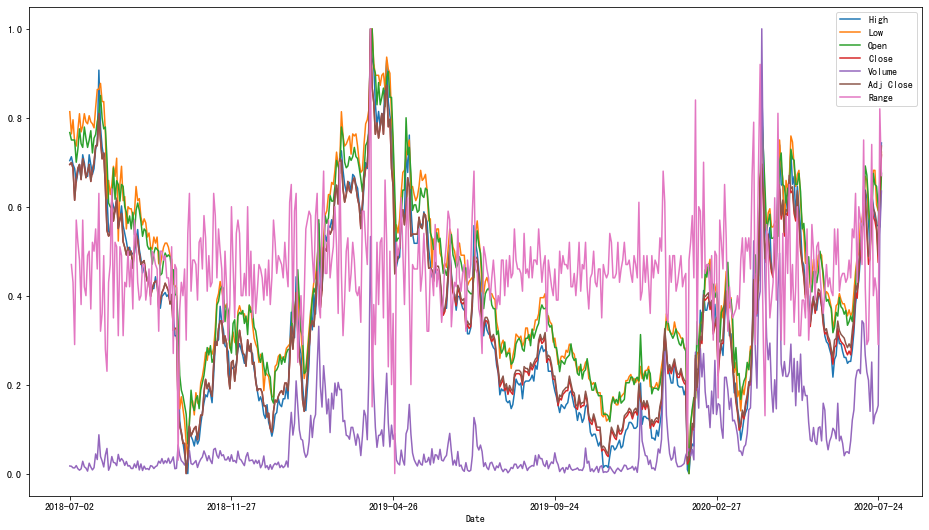

In [263]:
'''
    Min-Max 标准化是最常用的规范化手段
'''
df_min_max = (df - df.min()) / (df.max() - df.min())
df_min_max.plot(figsize=(16, 9))

In [264]:
#补充  使用Pycharts 工具包进行画K线图
# 导入pyecharts工具包，用pe作为简写
import pyecharts as pe
y2020 = df['2010-01-01':'2020-08-01']

# 提取x轴数据，即交易日期，同时转换为字符串形式
x = df.index.astype('str')
# 提取y轴数据，即绘制股票k线所必须的4个价格字段
y = y2020[['Open','Close','Low','High']].values

# 创建k线图对象，并设置大标题
kline = pe.Kline('2020_K线图_{}'.format(code))

# 绘制图表
kline.add('日', x, y,                           #图例名称，x轴数据，y轴数据
          is_datazoom_show=True,                #使用区域缩放组件
          datazoom_range=[97,100],              #设置区域缩放的范围，这里设置为末尾3%的k线数据
          mark_point=['max','min'],             #标记可视范围内开盘价最大值，最小值
          is_xaxislabel_align = True,           #设置x轴刻度与标签对齐
          tooltip_trigger ='axis',              #坐标轴触发弹窗提示
          tooltip_axispointer_type ='shadow')   #设置tooltip指示器

In [265]:
df['Ma5'] = df.Close.rolling(window=5).mean()  
df['Ma10'] = df.Close.rolling(window=10).mean()  
# df['Ma20'] = df.Close.rolling(window=20).mean()  
# df['Ma30'] = df.Close.rolling(window=30).mean()
# df['Ma60'] = df.Close.rolling(window=60).mean()

# print(df.tail())  # 查看前几行
# print(df.columns)  # 查看列名
# print(df.index)  # 查看索引
# print(df.describe())  # 查看各列数据描述性统计

kline = pe.Kline("{}".format(code),title_pos="40%")
ohlc = list(zip(df.Open,df.Close,df.Low,df.High))
dates = df.index


#is_datazoom_show=True 图表数据缩放  指定 markLine 位于开盘或者收盘上
kline.add("日K", dates, ohlc, is_datazoom_show=True,is_xaxis_show=False, legend_pos="85%",legend_orient="vertical",legend_top="45%",mark_line=["max"], mark_point=["max"])

line = pe.Line()
indic_name_list = ['Ma5','Ma10']
for indic_ma in indic_name_list:
      line.add(indic_ma, dates, df[indic_ma].tolist(),is_smooth=True)


bar = pe.Bar()
volume_rise=[df.Volume[x] if df.Close[x] > df.Open[x] else "0" for x in range(0, len(df.index))]
volume_drop=[df.Volume[x] if df.Close[x] <= df.Open[x] else "0" for x in range(0, len(df.index))]
#is_yaxis_show=True 显示y坐标轴
#datazoom_xaxis_index=[0, 1] 设置dataZoom控制索引为 0,1两个x 轴
bar.add("rvolume", dates, volume_rise, is_stack=True)
bar.add("dvolume", dates, volume_drop, is_stack=True,legend_pos="85%",legend_orient="vertical",legend_top="30%", \
        is_datazoom_show=True,tooltip_tragger="axis", is_legend_show=True, is_yaxis_show=True, datazoom_xaxis_index=[0, 1])

# buy and sell
es = pe.EffectScatter("buy")

short_long = np.sign(df['Ma5'] - df['Ma10'])
df['bs'] = np.sign(short_long - short_long.shift(1))


for i in range(0, len(df)):
    v1 = dates[i]
    if df.iloc[i]['bs'] == 1:
        v2 = df['Low'].iloc[i]
        es.add("buy", [v1], [v2], symbol="triangle")
    elif df.iloc[i]['bs'] == -1:
        v2 = df['High'].iloc[i]
        es.add( "sell", [v1], [v2], symbol="diamond",)


overlap = pe.Overlap()
overlap.add(kline)
overlap.add(line)
overlap.add(es)
grid = pe.Grid()
grid.add(bar, grid_top="70%",grid_right="15%")
grid.add(overlap, grid_bottom="30%",grid_right="15%")

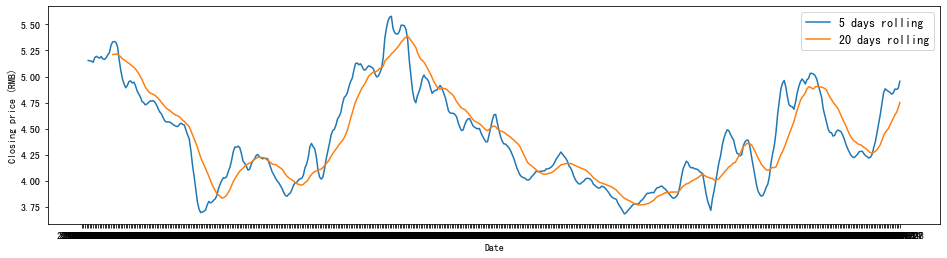

In [266]:
#计算5日线和10日线
y2020_close = y2020.Close
short_rolling = y2020_close.rolling(window=5).mean()
long_rolling = y2020_close.rolling(window=20).mean()

fig, ax = plt.subplots(figsize=(16,4))
ax.plot(short_rolling.index, short_rolling, label='5 days rolling')
ax.plot(long_rolling.index, long_rolling, label='20 days rolling')
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (RMB)')
ax.legend(fontsize='large')

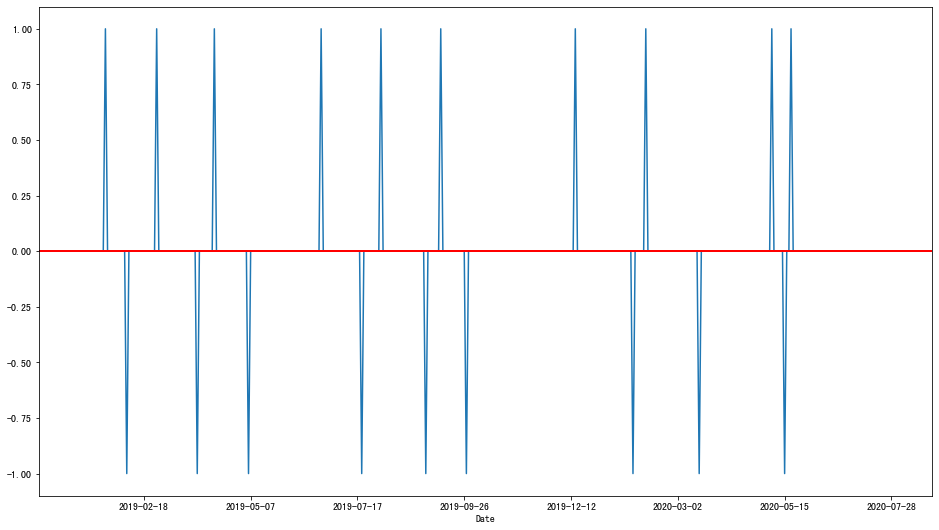

In [249]:
fig, ax = plt.subplots(figsize=(16,9))

short_long = np.sign(short_rolling - long_rolling)
buy_sell = np.sign(short_long - short_long.shift(1))
buy_sell.plot(ax=ax)
ax.axhline(y=0, color='red', lw=2)

In [250]:
buy_sell[buy_sell == 1]

Date
2019-01-16    1.0
2019-02-26    1.0
2019-04-04    1.0
2019-06-24    1.0
2019-08-01    1.0
2019-09-10    1.0
2019-12-16    1.0
2020-02-10    1.0
2020-05-07    1.0
2020-05-20    1.0
Name: Close, dtype: float64

In [251]:
buy_sell[buy_sell == -1]

Date
2019-01-30   -1.0
2019-03-25   -1.0
2019-05-06   -1.0
2019-07-19   -1.0
2019-08-30   -1.0
2019-09-27   -1.0
2020-01-23   -1.0
2020-03-16   -1.0
2020-05-15   -1.0
Name: Close, dtype: float64

In [86]:
#使用指标来绘制热力图
data = pd.merge(short_rolling,long_rolling,left_index=True,right_index=True)
print(data.head())

             Close_x  Close_y
Date                         
2018-01-02       NaN      NaN
2018-01-03       NaN      NaN
2018-01-04       NaN      NaN
2018-01-05       NaN      NaN
2018-01-08  15.02998      NaN


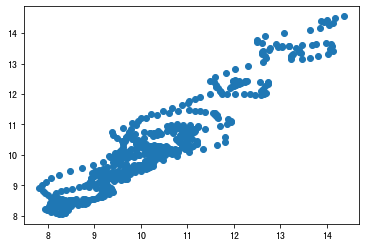

In [87]:
plt.scatter(data['Close_x'],data['Close_y'])

In [88]:
#加性模型预测Prophet
data = y2020['Close'].reset_index()
data = data.rename(columns={'Date': 'ds', 'Close': 'y'})
print(data.head())

           ds        y
0  2018-01-02  14.9333
1  2018-01-03  15.1083
2  2018-01-04  14.9333
3  2018-01-05  15.0333
4  2018-01-08  15.1417


In [89]:
import fbprophet
# growth default'linear'
# growth=logistic and must have capacity value, eg: df['cap']=100
model = fbprophet.Prophet(growth='linear', changepoint_prior_scale=0.05, daily_seasonality=True, weekly_seasonality=True) # 定义模型
model.add_seasonality(name='weekly', period=5, fourier_order=3, prior_scale=0.1)
model.fit(data) # 训练模型

In [90]:
forecast_df = model.make_future_dataframe(periods=20, freq='D') # 生成需预测序列
forecast = model.predict(forecast_df) # 模型预测

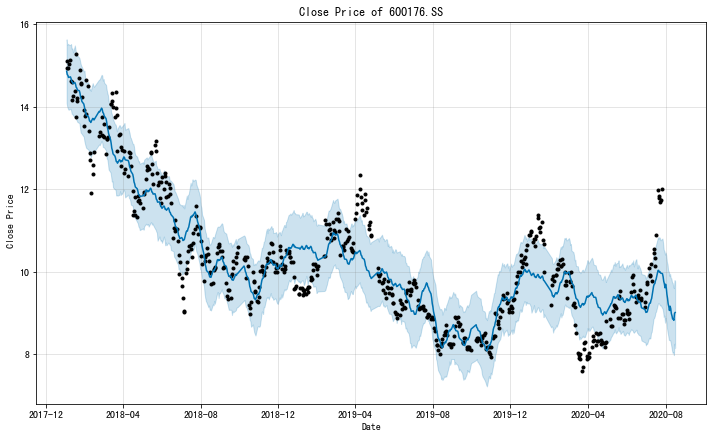

In [91]:
model.plot(forecast, xlabel = 'Date', ylabel = 'Close Price ¥'); # 绘制预测图
plt.title('Close Price of {}'.format(code));

In [92]:
def plot(m, fcst, ax=None, uncertainty=True, plot_cap=True, xlabel='ds', ylabel='y', plot_color='#0072B2'):
    """Plot the Prophet forecast.
    Parameters
    ----------
    m: Prophet model.
    fcst: pd.DataFrame output of m.predict.
    ax: Optional matplotlib axes on which to plot.
    uncertainty: Optional boolean to plot uncertainty intervals.
    plot_cap: Optional boolean indicating if the capacity should be shown
        in the figure, if available.
    xlabel: Optional label name on X-axis
    ylabel: Optional label name on Y-axis
    Returns
    -------
    A matplotlib figure.
    """
    if ax is None:
        fig = plt.figure(facecolor='w', figsize=(10, 6))
        ax = fig.add_subplot(111)
    else:
        fig = ax.get_figure()
    fcst_t = fcst['ds'].dt.to_pydatetime()
    ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.')
    ax.plot(fcst_t, fcst['yhat'], ls='-', c=plot_color)
    if 'cap' in fcst and plot_cap:
        ax.plot(fcst_t, fcst['cap'], ls='--', c='k')
    if m.logistic_floor and 'floor' in fcst and plot_cap:
        ax.plot(fcst_t, fcst['floor'], ls='--', c='k')
    if uncertainty:
        ax.fill_between(fcst_t, fcst['yhat_lower'], fcst['yhat_upper'],
                        color=plot_color, alpha=0.2)
    ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    fig.tight_layout()
    return fig

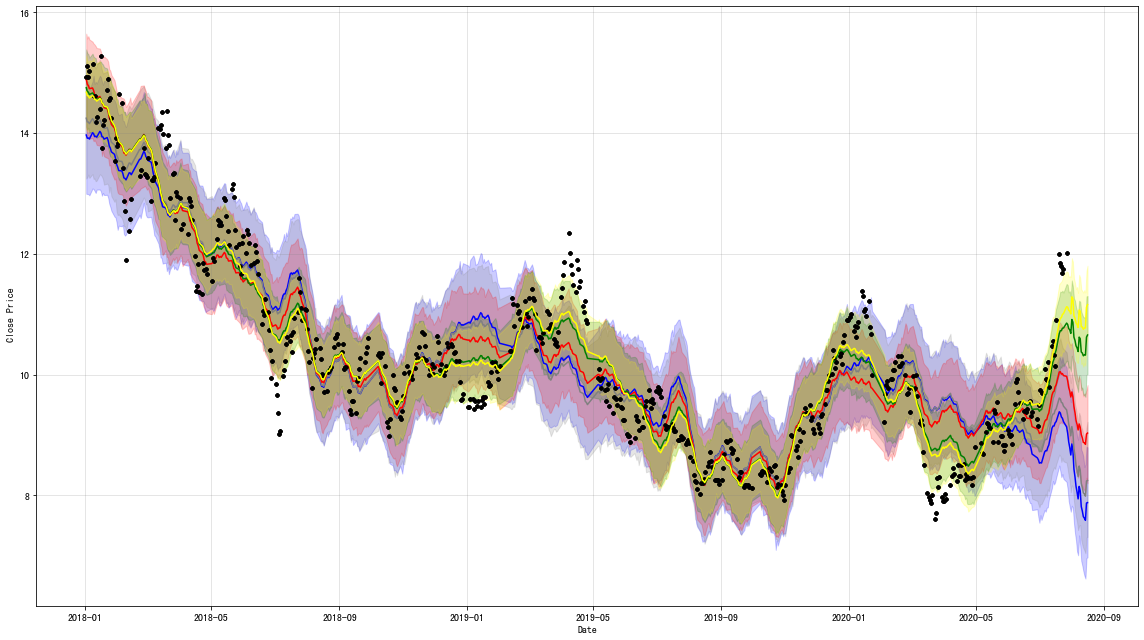

In [93]:
fig, ax = plt.subplots(figsize=(16,9))

# 此处代码运行时间较长，请耐心等待
for point, color in zip([0.01, 0.02, 0.05, 0.08, 0.1], ['blue', 'grey', 'red', 'green', 'yellow']):
    temp_model = fbprophet.Prophet(changepoint_prior_scale=point, daily_seasonality=True)
    temp_model.fit(data)
    forecast = temp_model.make_future_dataframe(periods=20, freq='D') # 20 day
    forecast = temp_model.predict(forecast)
    plot(temp_model, forecast, ax=ax, xlabel = 'Date', ylabel = 'Close Price ¥', plot_color=color);

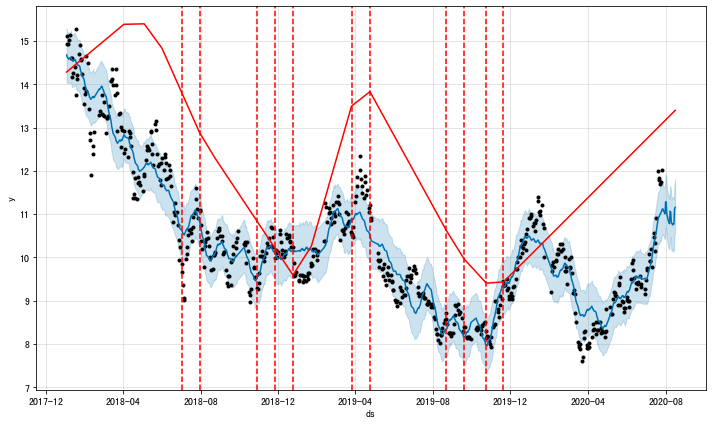

In [94]:
from fbprophet.plot import add_changepoints_to_plot

fig = model.plot(forecast) # 绘制预测图
a = add_changepoints_to_plot(fig.gca(), model, forecast) # 增加变化点

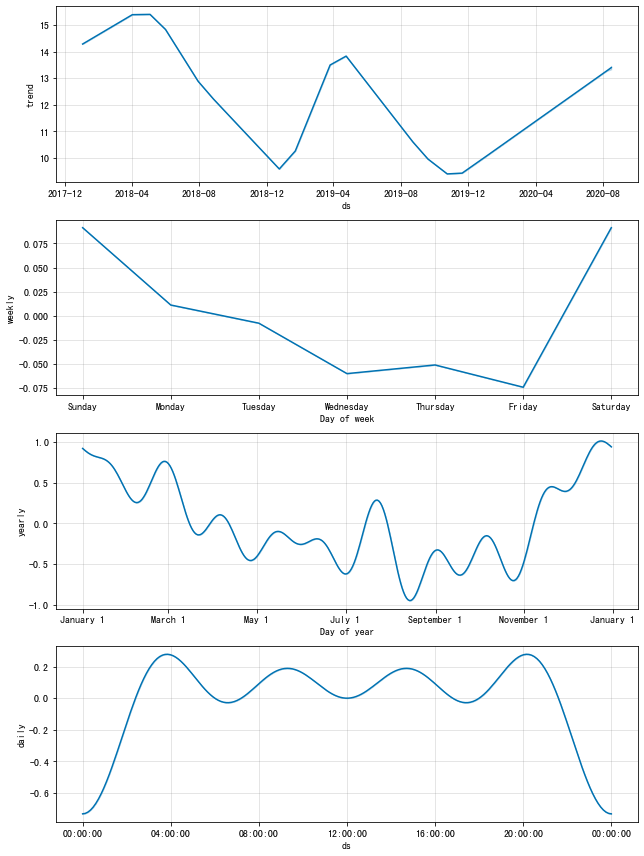

In [95]:
from fbprophet.plot import plot_components
model.plot_components(forecast); # 绘制多维度变化趋势图

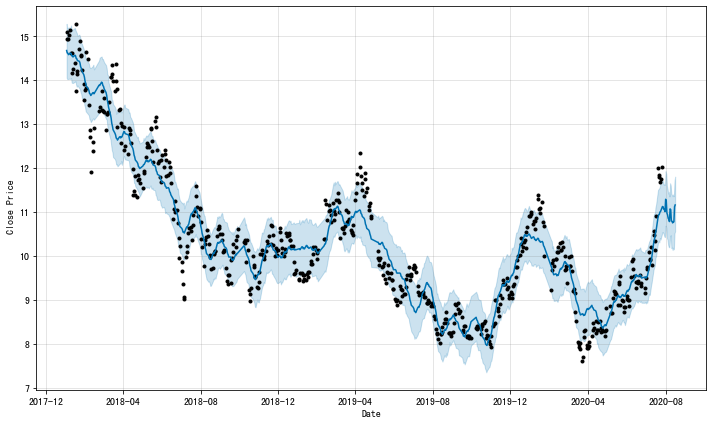

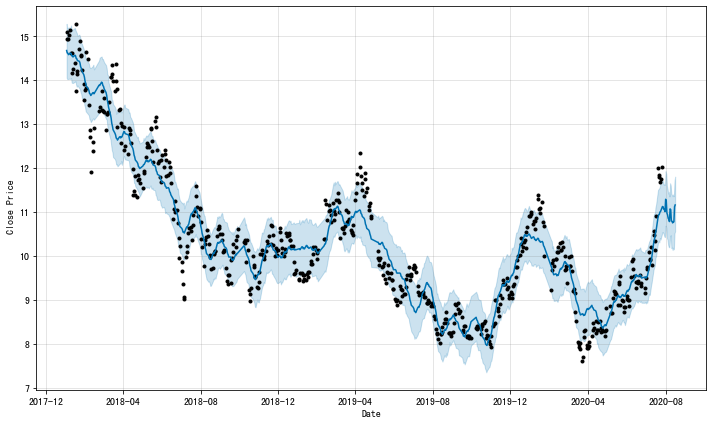

In [96]:
model.plot(forecast, xlabel = 'Date', ylabel = 'Close Price ¥')

<AxesSubplot:xlabel='Date'>

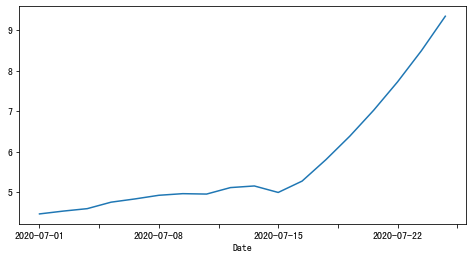

In [29]:
df['Close']['2020-07-01':'2020-08-01'].plot(figsize=(8,4))